In [135]:
import json
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
#fileTest = open("./DatabaseIA.json")
#data = json.load(fileTest)


In [67]:

df = pd.read_json("./Model/DatabaseIA.json")
X = df.loc[:, df.columns != 'Livre_Prefere']
Y = df.loc[:, 'Livre_Prefere']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)


In [8]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc



def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


In [9]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [10]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Text(0, 0.5, 'Fréquence')

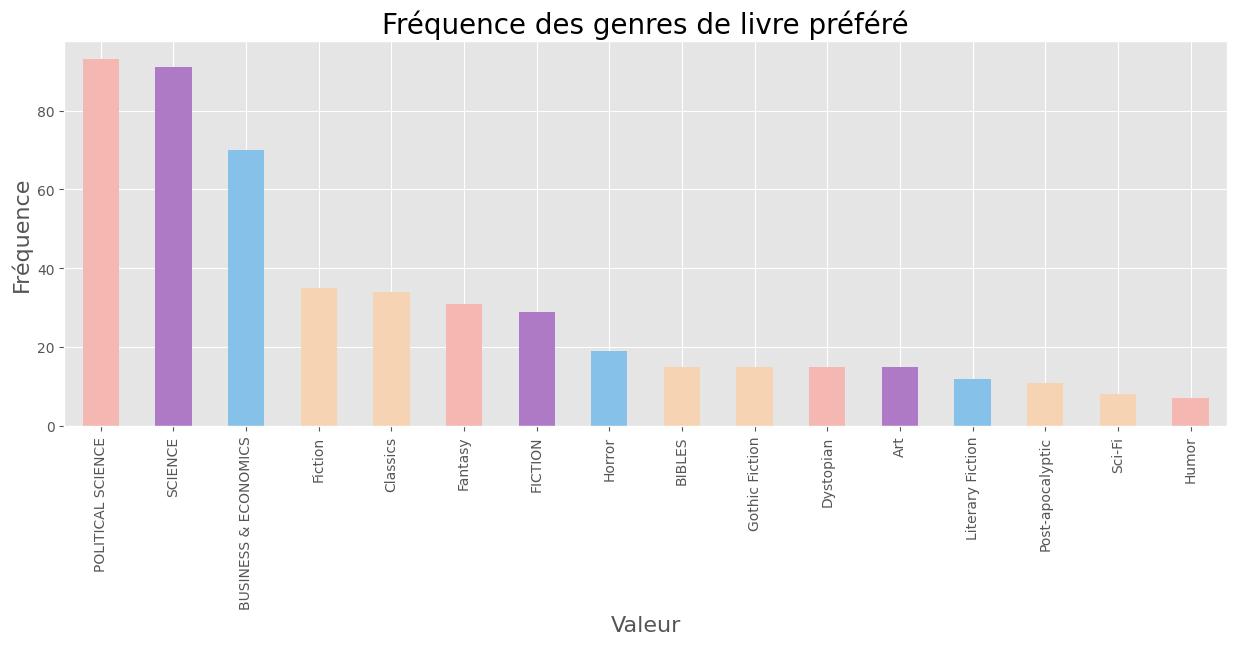

In [29]:


plt.style.use("ggplot")
colors = ["#F5B7B1", "#AF7AC5", "#85C1E9", "#F5D3B3", "#F5D3B3"]
df["Genre_Prefere"].value_counts().plot(kind="bar", figsize = (15,5), color= colors)
plt.title("Fréquence des genres de livre préféré", size=20)
plt.xlabel("Valeur", size = 16)
plt.ylabel("Fréquence", size = 16)



Feature 0: 99.075856
Feature 1: 80.226137
Feature 2: 531.185935
Feature 3: 20.566752
Feature 4: 1116.694789


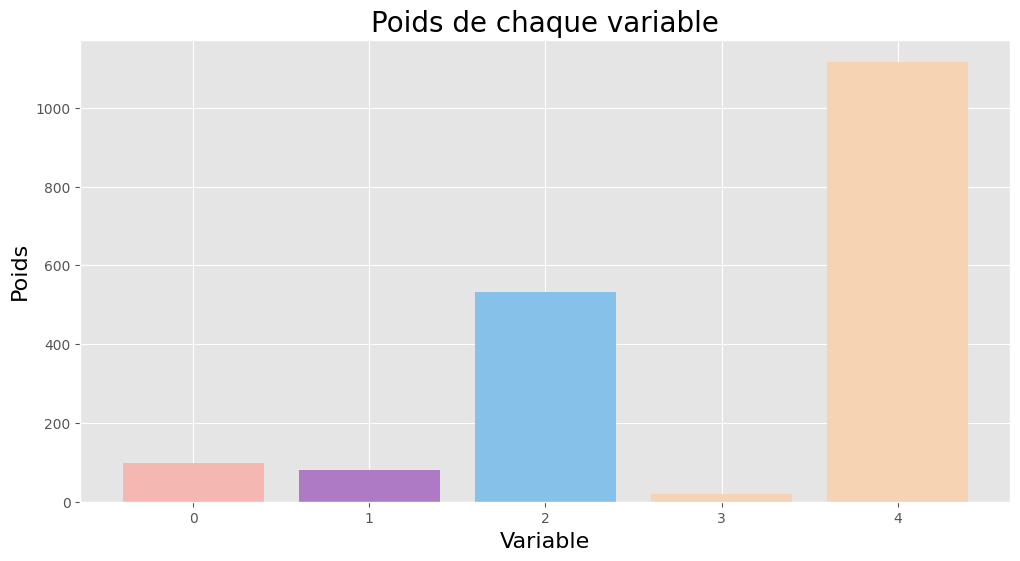

In [38]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.figure(figsize=(12, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_, color=colors)
plt.title("Poids de chaque variable", size=20)
plt.xlabel("Variable", size=16, color="black")
plt.ylabel("Poids", size=16, color="black")
plt.show()

In [12]:
df_train = df.sample(frac=0.8)
df_test = df.drop(df_train.index)
df_train.head()

,Nom,Prenom,Age,Sexe,Livre_Prefere,Genre_Prefere
494,Solo,James T.,66,Homme,The Lean Startup,BUSINESS & ECONOMICS
402,Spock,James T.,58,Homme,Dracula,Horror
35,Potter,Han,66,Femme,The Wealth of Nations,BUSINESS & ECONOMICS
222,Stark,James T.,15,Femme,Good to Great,BUSINESS & ECONOMICS
456,Bond,Jean-Luc,69,Femme,The Social Contract,POLITICAL SCIENCE


In [13]:
X_train.columns

Index(['Nom', 'Prenom', 'Age', 'Sexe', 'Genre_Prefere'], dtype='object')

In [40]:


X_new = X.drop(columns = ["Nom", "Prenom","Sexe"])
X_dummies = pd.get_dummies(X_new, columns = ["Age","Genre_Prefere"])
X_dummies.columns


Index(['Age_12', 'Age_13', 'Age_14', 'Age_15', 'Age_16', 'Age_17', 'Age_18',
       'Age_19', 'Age_20', 'Age_21', 'Age_22', 'Age_23', 'Age_24', 'Age_25',
       'Age_26', 'Age_27', 'Age_28', 'Age_29', 'Age_30', 'Age_31', 'Age_32',
       'Age_33', 'Age_34', 'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_39',
       'Age_40', 'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46',
       'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52', 'Age_53',
       'Age_54', 'Age_55', 'Age_56', 'Age_57', 'Age_58', 'Age_59', 'Age_60',
       'Age_61', 'Age_62', 'Age_63', 'Age_64', 'Age_65', 'Age_66', 'Age_67',
       'Age_68', 'Age_69', 'Age_70', 'Age_71', 'Age_72', 'Age_73', 'Age_74',
       'Age_75', 'Age_76', 'Age_77', 'Age_78', 'Age_79', 'Age_80',
       'Genre_Prefere_Art', 'Genre_Prefere_BIBLES',
       'Genre_Prefere_BUSINESS & ECONOMICS', 'Genre_Prefere_Classics',
       'Genre_Prefere_Dystopian', 'Genre_Prefere_FICTION',
       'Genre_Prefere_Fantasy', 'Genre_Prefere_Fiction',
 

In [41]:
label = LabelEncoder()
y_encoded= label.fit_transform(Y)

In [42]:


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_dummies, y_encoded, test_size = 0.2, random_state = 0, stratify = y_encoded)


In [115]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 32, activation = 'softmax'))
model.add(tf.keras.layers.Flatten())
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train_2, y_train_2, batch_size = 32, epochs = 50, validation_data=(X_test_2, y_test_2), verbose = 1)




Epoch 1/50
13/13 [==============================] - 2s 23ms/step - loss: 71.1632 - accuracy: 0.0200 - val_loss: 71.9121 - val_accuracy: 0.0200
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 71.1452 - accuracy: 0.0225 - val_loss: 71.9078 - val_accuracy: 0.0200
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 71.1430 - accuracy: 0.0100 - val_loss: 71.9067 - val_accuracy: 0.0000e+00
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 71.1422 - accuracy: 0.0100 - val_loss: 71.9062 - val_accuracy: 0.0100
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 71.1417 - accuracy: 0.0100 - val_loss: 71.9059 - val_accuracy: 0.0300
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 71.1414 - accuracy: 0.0125 - val_loss: 71.9057 - val_accuracy: 0.0300
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 71.1413 - accuracy: 0.0125 - val_loss: 71.9056 - val_accuracy: 0.0300
E

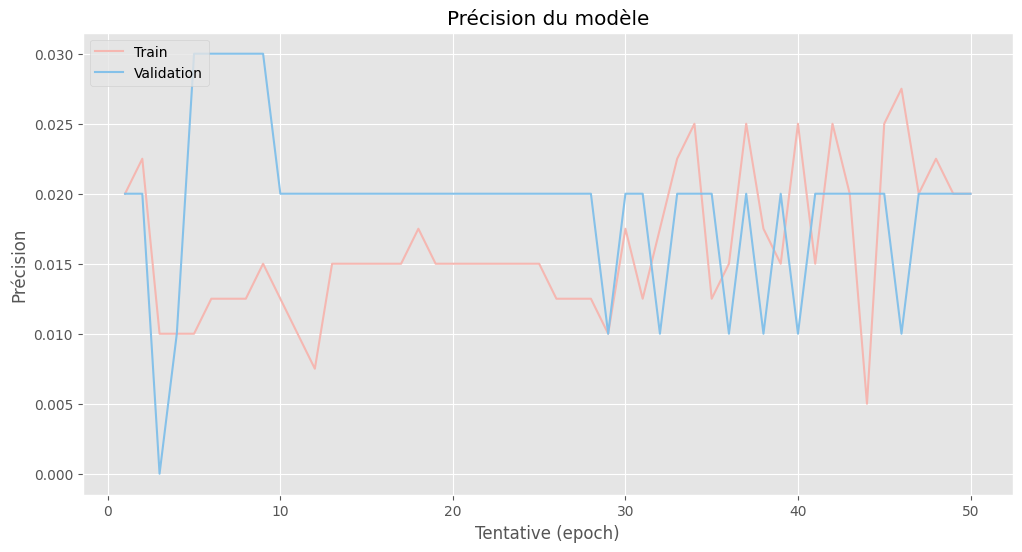

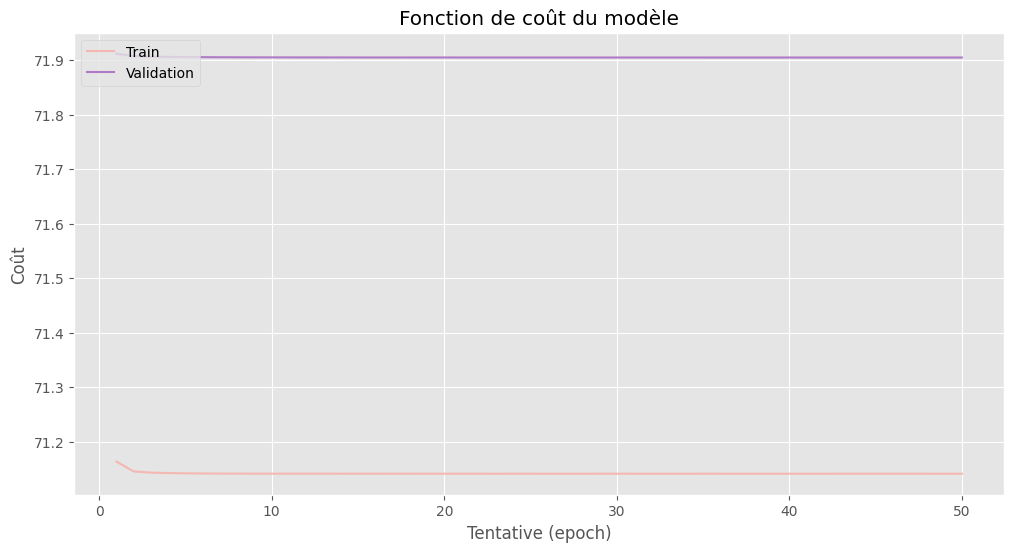

In [127]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.figure(figsize = (12,6))
  plt.plot(epochRange,history.history['accuracy'],color=colors[0])
  plt.plot(epochRange,history.history['val_accuracy'],color=colors[2])
  plt.title('Précision du modèle')
  plt.xlabel('Tentative (epoch)')
  plt.ylabel('Précision')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.figure(figsize = (12,6))
  plt.plot(epochRange,history.history['loss'], color=colors[0])
  plt.plot(epochRange,history.history['val_loss'], color=colors[1])
  plt.title('Fonction de coût du modèle')
  plt.xlabel('Tentative (epoch)')
  plt.ylabel('Coût')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()


plotLearningCurve(history,50)



In [142]:
y_pred = model.predict(X_test_2).argmax(axis=1)
cm=confusion_matrix(y_test_2, y_pred)

4/4 [==============================] - 0s 2ms/step


In [148]:
cm[6]

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Text(0.5, 1.0, 'Tableau de corrélation des valeurs prédites et réelles')

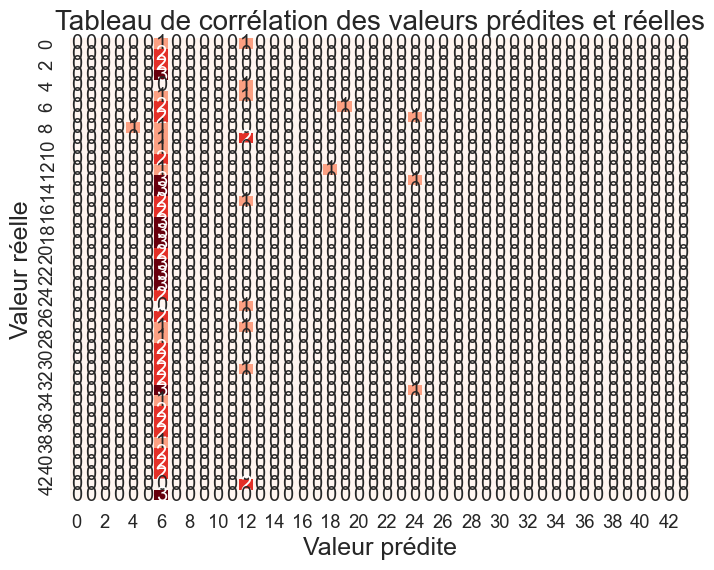

In [146]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt = 'g', cmap="Reds", cbar = False)
plt.xlabel("Valeur prédite", size = 18)
plt.ylabel("Valeur réelle", size = 18)
plt.title("Tableau de corrélation des valeurs prédites et réelles", size = 20)

In [ ]:
print(classification_report(y_test_2, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.02      1.00      0.04         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       0.00    

c:\Users\Quentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Quentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Quentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av